Imports and Configuration

In [60]:
from deap import base
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt

# Test different parameter combinations to find the smallest configuration
# that successfully finds a perfect solution (all bits = 1)
test_configs = [
    (50, 100),    # Test with population of 50, max 100 generations
    (100, 100),    # Test with population of 100, max 100 generations
    (200, 100),    # Test with population of 200, max 100 generations
    (300, 100),    # Test with population of 300, max 100 generations
    (400, 100),    # Test with population of 400, max 100 generations
    (500, 100),    # Test with population of 500, max 100 generations
    (600, 100),    # Test with population of 600, max 100 generations
    (700, 100),    # Test with population of 700, max 100 generations
    (800, 100),    # Test with population of 800, max 100 generations
]

# Store results from each test run
results = []

In [ ]:
import matplotlib.pyplot as plt

# Test different parameter combinations to find the smallest configuration
# that successfully finds a perfect solution (all bits = 1)
test_configs = [
    (50, 100),    # Test with population of 50, max 100 generations
    (100, 100),    # Test with population of 100, max 100 generations
    (200, 100),    # Test with population of 200, max 100 generations
    (300, 100),    # Test with population of 300, max 100 generations
    (400, 100),    # Test with population of 400, max 100 generations
    (500, 100),    # Test with population of 500, max 100 generations
   
]

# Store results from each test run
results = []

In [51]:
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
ONE_MAX_LENGTH = 50 

In [52]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [53]:

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [54]:

# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple

toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Roulette wheel selection (fitness-proportionate selection):
# Individuals are selected with probability proportional to their fitness
toolbox.register("select", tools.selRoulette)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [55]:

for POPULATION_SIZE, MAX_GENERATIONS in test_configs:
    # Print current test configuration
    print(f"\n{'='*60}")
    print(f"Testing: POPULATION_SIZE={POPULATION_SIZE}, MAX_GENERATIONS={MAX_GENERATIONS}")
    print(f"{'='*60}")
    
    # Clean up and recreate creators for each test (to avoid conflicts)
    if hasattr(creator, 'FitnessMax'):
        del creator.FitnessMax
    if hasattr(creator, 'Individual'):
        del creator.Individual
        
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0

    # calculate fitness tuple for each individual in the population:
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue

    # extract fitness values from all individuals in population:
    fitnessValues = [individual.fitness.values[0] for individual in population]

    # initialize statistics accumulators:
    maxFitnessValues = []
    meanFitnessValues = []


Testing: POPULATION_SIZE=50, MAX_GENERATIONS=100

Testing: POPULATION_SIZE=100, MAX_GENERATIONS=100

Testing: POPULATION_SIZE=200, MAX_GENERATIONS=100

Testing: POPULATION_SIZE=300, MAX_GENERATIONS=100

Testing: POPULATION_SIZE=400, MAX_GENERATIONS=100

Testing: POPULATION_SIZE=500, MAX_GENERATIONS=100


In [57]:

    while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        # update counter:
        generationCounter = generationCounter + 1

        # apply the selection operator, to select the next generation's individuals:
        offspring = toolbox.select(population, len(population))
        # clone the selected individuals (necessary for proper GA operation):
        # Without cloning, we would modify the original population directly
        offspring = list(map(toolbox.clone, offspring))

        # apply the crossover operator to pairs of offspring:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # replace the current population with the offspring:
        population[:] = offspring

        # collect fitnessValues into a list, update statistics and print:
        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

        # find and print best individual:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_index], "\n")

In [62]:

    # A perfect solution has all bits set to 1, so fitness = ONE_MAX_LENGTH
    if max(fitnessValues) == ONE_MAX_LENGTH:
        # Calculate total individuals processed (population size × generations)
        individuals_processed = POPULATION_SIZE * generationCounter
        print(f"\n*** SUCCESS! Perfect solution found in generation {generationCounter}")
        print(f"*** Individuals processed: {individuals_processed} ({POPULATION_SIZE} × {generationCounter})")
        # Store result: (pop_size, max_gen, actual_gen_used, individuals_processed, success_flag)
        results.append((POPULATION_SIZE, MAX_GENERATIONS, generationCounter, individuals_processed, True))
    else:
        print(f"\n*** FAILED - Did not find perfect solution within {MAX_GENERATIONS} generations")
        # Store failed result
        results.append((POPULATION_SIZE, MAX_GENERATIONS, generationCounter, None, False))
   


*** SUCCESS! Perfect solution found in generation 94
*** Individuals processed: 47000 (500 × 94)


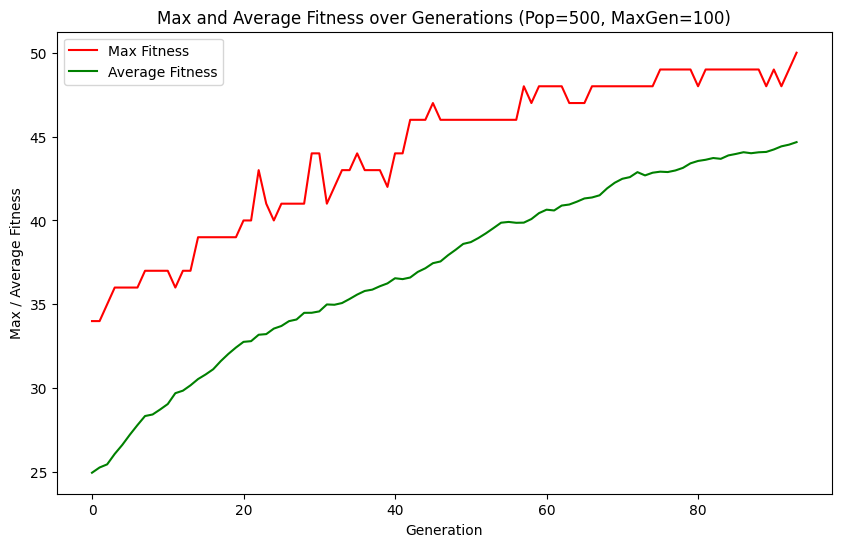

In [63]:
 
    # Genetic Algorithm is done - plot statistics:
    plt.figure(figsize=(10, 6))
    plt.plot(maxFitnessValues, color='red', label='Max Fitness')
    plt.plot(meanFitnessValues, color='green', label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title(f'Max and Average Fitness over Generations (Pop={POPULATION_SIZE}, MaxGen={MAX_GENERATIONS})')
    plt.legend()
    plt.show()